# Netflix Dataset Analysis

This notebook performs **Exploratory Data Analysis (EDA)** on the provided *Netflix Dataset.csv*. It includes data loading, cleaning, and multiple visualizations for trends, categories, and content insights.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Inline display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

# Load dataset
df = pd.read_csv('./Netflix Dataset.csv')
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

 Dataset Loaded Successfully!
Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.


In [14]:
# Dataset Info & Missing Values
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

--- Missing Values ---
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [15]:
# Clean and preprocess data
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['release_year_parsed'] = df['Release_Date'].dt.year

# Extract duration numeric and unit
df['duration_num'] = df['Duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['Duration'].str.extract(r'([A-Za-z ]+)$')[0].str.strip()

# Clean columns
df.columns = [c.strip() for c in df.columns]

print(" Data Cleaning Completed")
df.head(3)

 Data Cleaning Completed


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,release_year_parsed,duration_num,duration_unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.",2020.0,4.0,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.",2016.0,93.0,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",2018.0,78.0,min


## Category & Rating Overview

In [16]:
# Category and Rating Overview
print("\n--- Category Distribution ---")
print(df['Category'].value_counts())

print("\n--- Rating Distribution ---")
print(df['Rating'].value_counts())


--- Category Distribution ---
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

--- Rating Distribution ---
Rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


## Visualizations

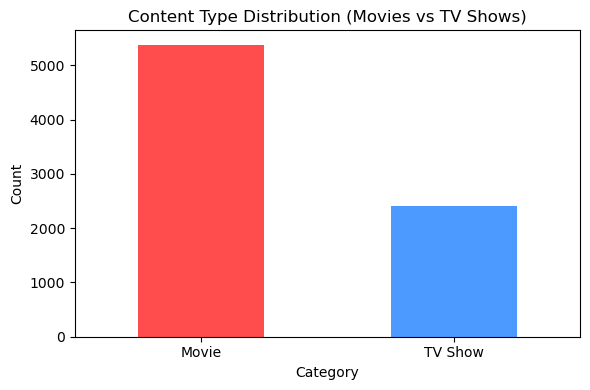

In [17]:
# Plot 1: Content Type Distribution
plt.figure(figsize=(6,4))
df['Category'].value_counts().plot(kind='bar', color=['#ff4c4c','#4c9aff'])
plt.title('Content Type Distribution (Movies vs TV Shows)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

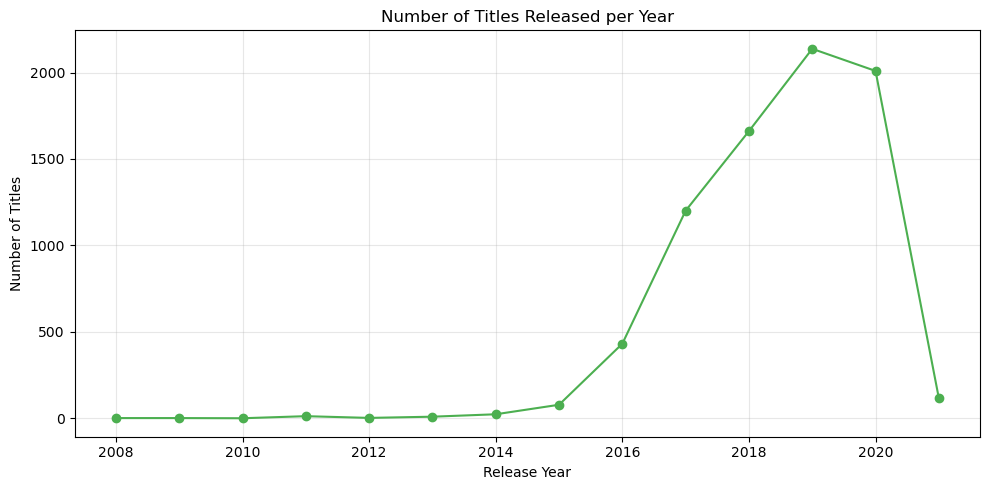

In [18]:
# Plot 2: Titles Released per Year
plt.figure(figsize=(10,5))
df['release_year_parsed'].value_counts().sort_index().plot(kind='line', marker='o', color='#4CAF50')
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

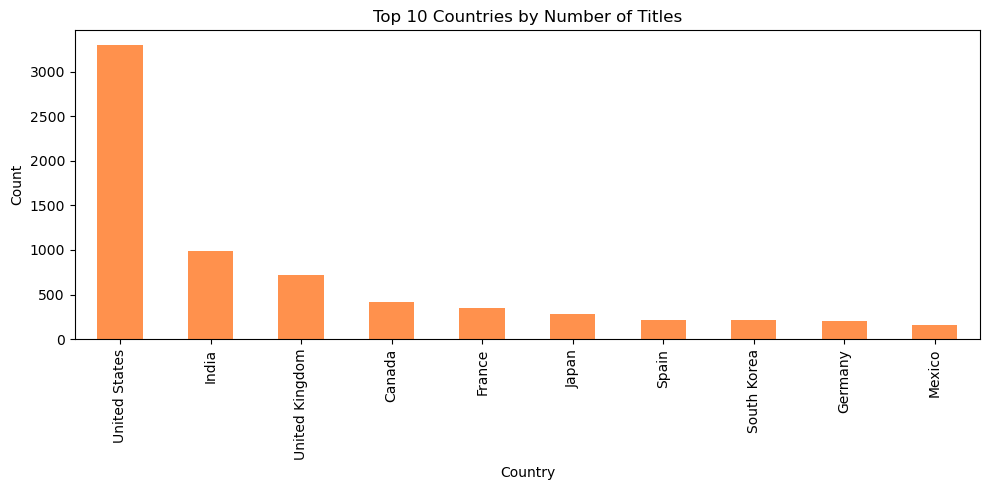

In [19]:
# Plot 3: Top 10 Countries
plt.figure(figsize=(10,5))
country_explode = df['Country'].dropna().astype(str).str.split(',').explode().str.strip()
country_explode.value_counts().head(10).plot(kind='bar', color='#ff914d')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

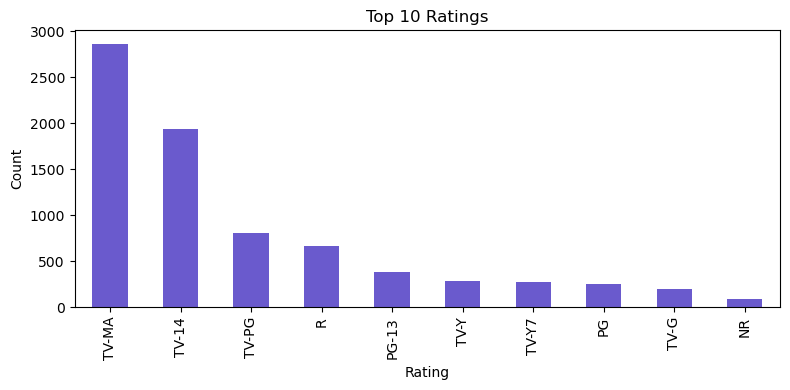

In [20]:
# Plot 4: Top 10 Ratings
plt.figure(figsize=(8,4))
df['Rating'].value_counts().head(10).plot(kind='bar', color='#6a5acd')
plt.title('Top 10 Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

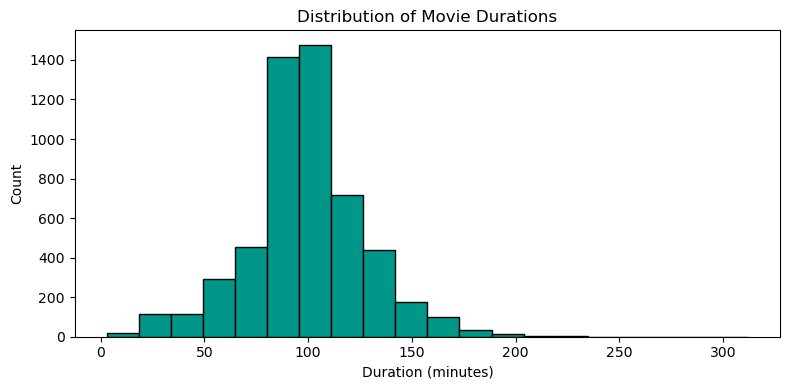

In [21]:
# Plot 5: Duration Distribution (Movies Only)
plt.figure(figsize=(8,4))
movie_df = df[df['Category'].str.contains('Movie', case=False, na=False)]
movie_df['duration_num'].dropna().plot(kind='hist', bins=20, color='#009688', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

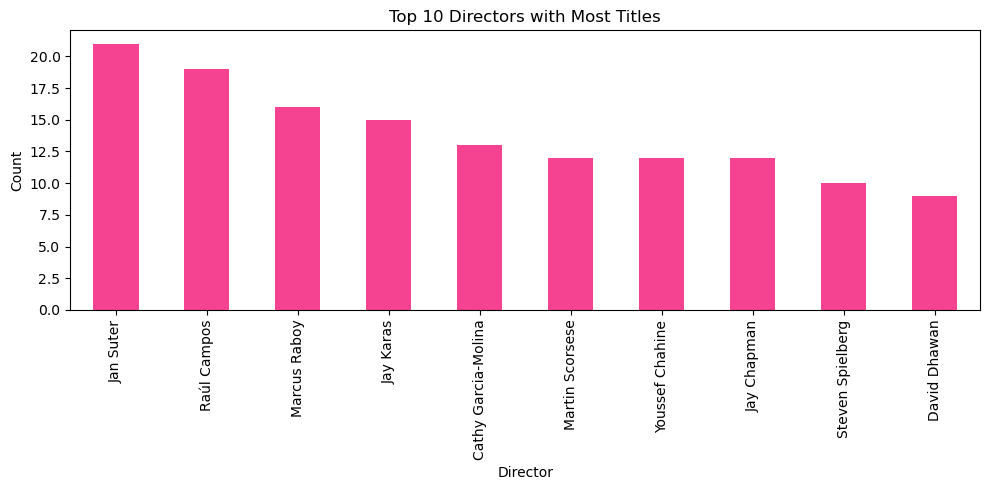

In [22]:
# Plot 6: Top 10 Directors
plt.figure(figsize=(10,5))
df['Director'].dropna().astype(str).str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='#f54291')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Director')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Insights Summary

In [24]:
print(" EDA Completed!\n")
print(f"Total Titles: {len(df)}")
print(f"Movies: {len(df[df['Category'].str.contains('Movie', case=False, na=False)])}")
print(f"TV Shows: {len(df[df['Category'].str.contains('TV', case=False, na=False)])}")
print(f"Years Covered: {int(df['release_year_parsed'].min())} - {int(df['release_year_parsed'].max())}")

 EDA Completed!

Total Titles: 7789
Movies: 5379
TV Shows: 2410
Years Covered: 2008 - 2021
